In [1]:
import numpy as np
import hockey.hockey_env as h_env
import gymnasium as gym
from importlib import reload
import time

In [2]:
np.set_printoptions(suppress=True)

In [3]:
reload(h_env)

c:\Users\pmaty\miniconda3\envs\rl_hw\Lib\site-packages\gymnasium\envs\registration.py:642: UserWarning: WARN: Overriding environment Hockey-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
c:\Users\pmaty\miniconda3\envs\rl_hw\Lib\site-packages\gymnasium\envs\registration.py:642: UserWarning: WARN: Overriding environment Hockey-One-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


<module 'hockey.hockey_env' from 'c:\\Users\\pmaty\\Desktop\\RL_TUE\\HW\\rl-hockey-homework\\hockey-env\\hockey\\hockey_env.py'>

# Normal Game Play

In [4]:
env = h_env.HockeyEnv()

have a look at the initialization condition: alternating who starts and are random in puck position

In [5]:
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
_ = env.render()

<frozen importlib._bootstrap>:488: RuntimeWarning: Your system is avx2 capable but pygame was not built with support for it. The performance of some of your blits could be adversely affected. Consider enabling compile time detection with environment variables like PYGAME_DETECT_AVX2=1 if you are compiling without cross compilation.


one episode with random agents

In [6]:
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()

for _ in range(600):
    env.render(mode="human")
    a1 = np.random.uniform(-1,1,4)
    a2 = np.random.uniform(-1,1,4)    
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d or t: break

Without rendering, it runs much faster

"info" dict contains useful proxy rewards and winning information

In [7]:
info, env.get_info_agent_two()

({'winner': 0,
  'reward_closeness_to_puck': -0.12682656369535164,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': 0.0},
 {'winner': 0,
  'reward_closeness_to_puck': 0.0,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': -0.0})

Winner == 0: draw

Winner == 1: you (left player)

Winner == -1: opponent wins (right player)

In [8]:
env.close()

# Train Shooting

In [9]:
env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_SHOOTING)

In [10]:
o, info = env.reset()
_ = env.render()

for _ in range(50):
    env.render()
    a1 = [1,0,0,1] # np.random.uniform(-1,1,4)
    a2 = [0,0.,0,0] 
    obs, r, d, t , info = env.step(np.hstack([a1,a2]))
    obs_agent2 = env.obs_agent_two()
    if d or t: break

In [11]:
env.close()

# Train DEFENDING

In [12]:
env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_DEFENSE)

In [13]:
o, info = env.reset()
_ = env.render()

for _ in range(60):
    env.render()
    a1 = [0.1,0,0,1] # np.random.uniform(-1,1,3)
    a2 = [0,0.,0,0] 
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))
    print(r)
    obs_agent2 = env.obs_agent_two()
    if d or t: break

-0.5135584691465626
-0.3400082017945034
-0.20079731465290412
-0.09014566659022215
-0.02623843629063002
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
10.0


In [14]:
env.close()

# Using discrete actions

In [15]:
import random

In [16]:
env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_SHOOTING)

In [17]:
env.reset()
for _ in range(251):
    env.render()
    a1_discrete = random.randint(0,7)
    a1 = env.discrete_to_continous_action(a1_discrete)
    a2 = [0,0.,0,0 ] 
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d or t: break

In [18]:
env.close()

# Hand-crafted Opponent

In [19]:
env = h_env.HockeyEnv()

In [20]:
o, info = env.reset()
_ = env.render()
player1 = h_env.BasicOpponent(weak=False)
player2 = h_env.BasicOpponent()

In [21]:
obs_buffer = []
reward_buffer=[]
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
for _ in range(251):
    env.render()
    a1 = player1.act(obs)
    a2 = player2.act(obs_agent2)
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_buffer.append(obs)
    reward_buffer.append(r)
    obs_agent2 = env.obs_agent_two()
    if d or t: break
obs_buffer = np.asarray(obs_buffer)
reward_buffer = np.asarray(reward_buffer)

In [22]:
np.mean(obs_buffer,axis=0)

array([-3.04998907,  0.55709893, -0.04774087,  0.00119894,  0.22774508,
        0.15391359,  3.19390148,  0.3206456 ,  0.02063502,  0.06602985,
       -0.04573611, -0.00854249,  0.13631337,  0.88055559,  0.9261484 ,
        0.17089789,  1.67330677,  0.41832669])

In [23]:
np.std(obs_buffer,axis=0)

array([ 0.57202511,  0.78286255,  0.64961345,  3.70089766,  4.44966057,
        3.33312245,  0.34375299,  0.46399035,  0.13299324,  2.18303411,
        1.3268268 ,  0.69439769,  2.04137108,  1.50025692, 15.82332285,
       11.76431981,  4.01054941,  2.13216283])

If you want to use a fixed observation scaling, this might be a reasonable choice

In [24]:
scaling = [ 1.0,  1.0 , 0.5, 4.0, 4.0, 4.0,  
            1.0,  1.0,  0.5, 4.0, 4.0, 4.0,  
            2.0, 2.0, 10.0, 10.0, 4,0 ,4,0]

In [25]:
import pylab as plt

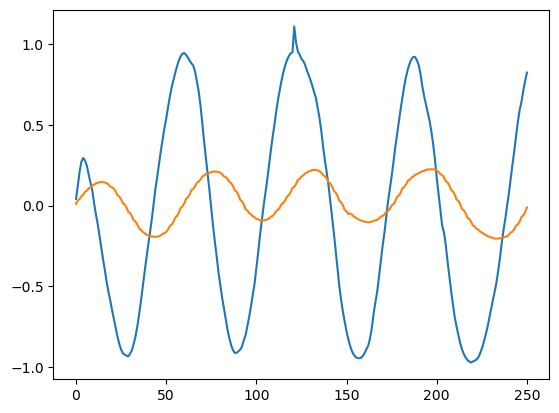

In [26]:
plt.plot(obs_buffer[:,2])
plt.plot(obs_buffer[:,8])

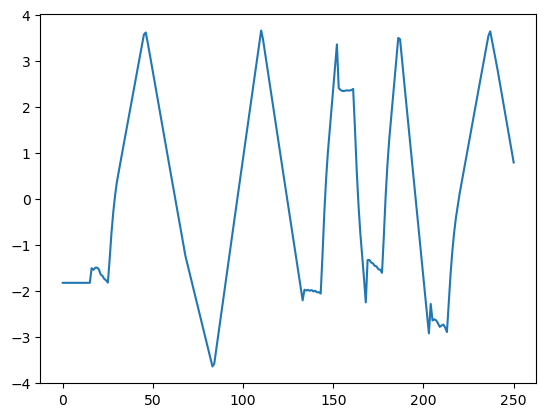

In [27]:
plt.plot(obs_buffer[:,12])

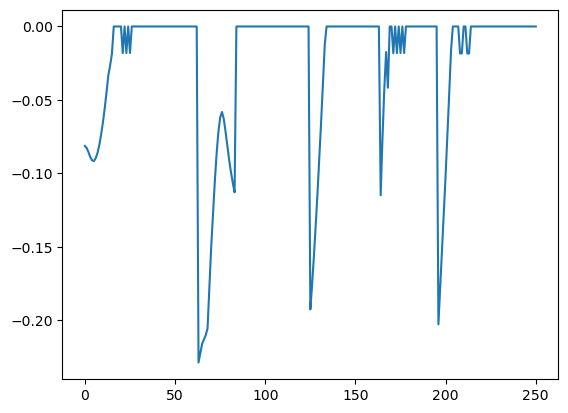

In [28]:
plt.plot(reward_buffer[:])

In [29]:
np.sum(reward_buffer)

np.float64(-6.224772779397663)

In [30]:
info2 = env.get_info_agent_two()
info, info2, env.get_reward(info), env.get_reward_agent_two(info2)

({'winner': 0,
  'reward_closeness_to_puck': 0.0,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': -0.0017974519348144533},
 {'winner': 0,
  'reward_closeness_to_puck': 0.0,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': 0.0017974519348144533},
 0.0,
 0.0)

In [31]:
env.close()

# Human Opponent

In [32]:
env = h_env.HockeyEnv()

In [33]:
player1 = h_env.HumanOpponent(env=env, player=1)
player2 = h_env.BasicOpponent()


Human Controls:
 left:			left arrow key left
 right:			arrow key right
 up:			arrow key up
 down:			arrow key down
 tilt clockwise:	w
 tilt anti-clockwise:	s
 shoot :	space


In [34]:
player1 = h_env.BasicOpponent()
player2 = h_env.HumanOpponent(env=env, player=2)


Human Controls:
 left:			left arrow key left
 right:			arrow key right
 up:			arrow key up
 down:			arrow key down
 tilt clockwise:	w
 tilt anti-clockwise:	s
 shoot :	space


In [36]:
obs, info = env.reset()

env.render()
time.sleep(1)
obs_agent2 = env.obs_agent_two()
for _ in range(100):
    time.sleep(0.2)
    env.render()
    a1 = player1.act(obs) 
    a2 = player2.act(obs_agent2)
    obs, r, d, _, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d: break

In [37]:
env.close()

# Check side consistency

In [38]:
env = h_env.HockeyEnv()

In [39]:
o, info = env.reset()
_ = env.render()
player1 = h_env.BasicOpponent(weak=False)
player2 = h_env.BasicOpponent(weak=False)

In [40]:
obs_buffer = []
reward_buffer=[]
obs2_buffer = []
winner_buffer = []
reward2_buffer=[]
for game in range(1000):
    obs, info = env.reset()
    obs_agent2 = env.obs_agent_two()
    for _ in range(500):
        # env.render()
        a1 = player1.act(obs)
        a2 = player2.act(obs_agent2)
#        a1 = np.random.uniform(-1,1,4)
#        a2 = np.random.uniform(-1,1,4)    
        obs, r, d, t, info = env.step(np.hstack([a1,a2]))
        info2 = env.get_info_agent_two()
        r2 = env.get_reward_agent_two(info2)
        obs_buffer.append(obs)
        obs_agent2 = env.obs_agent_two()
        obs2_buffer.append(obs_agent2)
        reward_buffer.append(r)
        reward2_buffer.append(r2)
        if d or t:
            winner_buffer.append(info["winner"])
            break
obs_buffer = np.asarray(obs_buffer)
reward_buffer = np.asarray(reward_buffer)
obs2_buffer = np.asarray(obs2_buffer)
reward2_buffer = np.asarray(reward2_buffer)

In [41]:
obs_buffer.shape

(146666, 18)

In [42]:
np.mean(obs_buffer,axis=0)

array([-2.94780227,  0.01091055, -0.00100543, -0.05873095, -0.00337962,
        0.00492449,  2.95653317, -0.00209866, -0.00077664,  0.05177564,
        0.01265426,  0.00416236,  0.02918961,  0.00265093,  0.06538623,
       -0.01895688,  1.15118705,  1.12326647])

In [43]:
(np.std(obs_buffer,axis=0) - np.std(obs2_buffer,axis=0)) / np.std(obs_buffer,axis=0)

array([ 0.0114146 , -0.00386084,  0.00051395,  0.00425744,  0.00093517,
        0.00283977, -0.0115464 ,  0.003846  , -0.00051422, -0.00427565,
       -0.00093605, -0.00284786,  0.        ,  0.        ,  0.        ,
        0.        ,  0.01084155, -0.01096037])

In [44]:
winner_buffer

[-1,
 -1,
 1,
 0,
 -1,
 -1,
 0,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 0,
 -1,
 0,
 -1,
 -1,
 0,
 0,
 -1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 -1,
 0,
 0,
 0,
 -1,
 0,
 -1,
 0,
 1,
 1,
 0,
 0,
 -1,
 1,
 0,
 0,
 -1,
 1,
 1,
 0,
 0,
 0,
 -1,
 1,
 -1,
 -1,
 0,
 1,
 1,
 -1,
 0,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 0,
 -1,
 0,
 0,
 0,
 -1,
 0,
 -1,
 0,
 0,
 1,
 0,
 0,
 0,
 -1,
 1,
 0,
 -1,
 -1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 -1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 1,
 -1,
 1,
 0,
 0,
 -1,
 -1,
 0,
 -1,
 -1,
 0,
 1,
 1,
 0,
 -1,
 -1,
 0,
 -1,
 1,
 -1,
 -1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 -1,
 0,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 0,
 0,
 1,
 1,
 -1,
 0,
 0,
 0,
 1,
 -1,
 -1,
 0,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 0,
 1,
 -1,
 0,
 -1,
 1,
 1,
 -1,
 0,
 0,
 1,
 -1,
 1,
 0,
 1,
 0,
 -1,
 0,
 -1,
 1,
 1,
 0,
 -1,
 0,
 0,
 -1,
 0,
 0,
 1,
 0,
 0,
 -1,
 0,
 -1,
 0,
 0,


In [45]:
np.mean(winner_buffer,axis=0)

np.float64(0.067)

In [46]:
np.std(winner_buffer,axis=0)

np.float64(0.8139477870232218)

In [47]:
np.sum(reward_buffer), np.sum(reward2_buffer)

(np.float64(-3485.644560594007), np.float64(-4771.700983532396))

In [48]:
env.close()